
# **Tarea: simulación y análisis de Paseos Aleatorios Simples**  


Esta tarea tiene como objetivo la implementación y análisis de paseos aleatorios simples en dos escenarios:  
1. **Tiempo discreto:** $t\in\{1,2,\ldots,\}$. 
2. **Tiempo continuo:** $t\in [0,  \infty)$.  

Además, se realizará un **análisis estadístico** del proceso en distintos instantes de tiempo y se utilizará el **método de Montecarlo** para validar las propiedades del proceso.

#### **Parte 1: Paseo Aleatorio Simple en tiempo discreto**  

Un **paseo aleatorio simple** es un proceso estocástico definido por:

$$
S_t = S_{t-1} + X_t, \quad t = 1, 2, 3, \dots
$$

donde:
- $S_t$  representa la posición en el instante  $t$.
- $X_t$  es una variable aleatoria i.i.d. tales que:
  $$
  X_t =
  \begin{cases} 
  +1, & \text{con probabilidad } \frac{1}{2} \\
  -1, & \text{con probabilidad } \frac{1}{2} 
  \end{cases}
  $$

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo discreto.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.

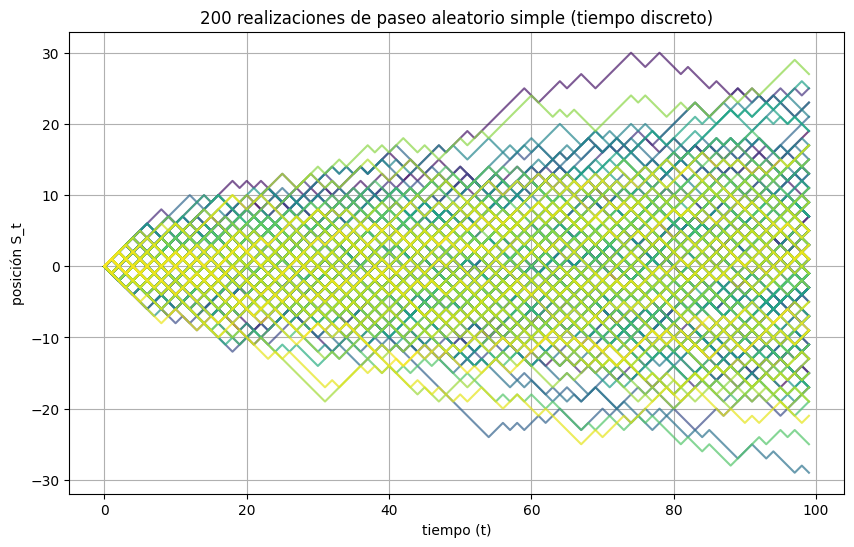

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# semilla
np.random.seed(987)

# parámetros 
n_steps = 100  
n_simulations = 200 

# matriz para almacenar las posiciones
S_discreto = np.zeros((n_simulations, n_steps))  # Renombrada para el paseo aleatorio discreto

# simulaciones (paseo aleatorio discreto)
for i in range(n_simulations):
    # generar los pasos de cada simulación con valores +1 o -1 con probabilidad 1/2
    X = np.random.choice([-1, 1], size=n_steps)  # valores +1 o -1 con probabilidad 1/2

    # calcular las posiciones S_t
    S_discreto[i, 0] = 0  # S_0 = 0
    for t in range(1, n_steps):
        S_discreto[i, t] = S_discreto[i, t - 1] + X[t]

# graficar trayectorias del paseo aleatorio discreto
plt.figure(figsize=(10, 6))
for i in range(n_simulations):
    plt.plot(S_discreto[i, :], color=plt.cm.viridis(i / n_simulations), alpha=0.7)  # colores distintos
plt.title('200 realizaciones de paseo aleatorio simple (tiempo discreto)')
plt.xlabel('tiempo (t)')
plt.ylabel('posición S_t')
plt.grid(True)
plt.show()

---
#### **Parte 2: Paseo Aleatorio Simple en tiempo continuo**  

Consideremos ahora la versión del **paseo aleatorio simple en tiempo continuo** donde $X_t \sim N(0,1)$ son variables aleatorias i.i.d. normales estándar.

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo continuo.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.

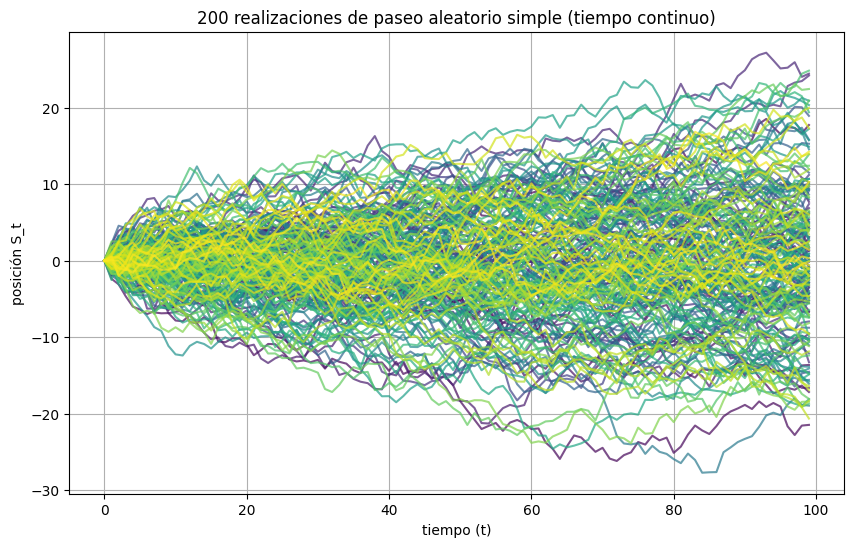

In [20]:
# semilla
np.random.seed(987)

# parámetros 
n_steps = 100  
n_simulations = 200 

# matriz para almacenar las posiciones (para el paseo aleatorio en tiempo continuo)
S_continuo = np.zeros((n_simulations, n_steps))

# simulaciones (paseo aleatorio simple en tiempo continuo)
for i in range(n_simulations):
    # generar los pasos de cada simulación con distribución normal N(0,1)
    X = np.random.normal(0, 1, size=n_steps)  # normal N(0,1)

    # calcular las posiciones S_t
    S_continuo[i, 0] = 0  # S_0 = 0
    for t in range(1, n_steps):
        S_continuo[i, t] = S_continuo[i, t - 1] + X[t]

# graficar trayectorias
plt.figure(figsize=(10, 6))
for i in range(n_simulations):
    plt.plot(S_continuo[i, :], color=plt.cm.viridis(i / n_simulations), alpha=0.7)  # colores distintos
plt.title('200 realizaciones de paseo aleatorio simple (tiempo continuo)')
plt.xlabel('tiempo (t)')
plt.ylabel('posición S_t')
plt.grid(True)
plt.show()

---
#### **Parte 3: Cálculo de Media y Varianza en Instantes Específicos**  

Consideremos ahora el **paseo aleatorio simple en tiempo discreto** de la Parte 1. Para analizar la evolución del proceso, se pide:

1. Calcular la **media muestral** y la **varianza muestral** de  $S_t$  en los tiempos: $t = 5$, $t = 15$ y $t = 25$.
2. Comprobar que los resultados son acordes a lo visto en clase.

In [21]:
# calcular media y varianza en cada t
times = [5, 15, 25]
mean_values = []
variance_values = []

for t in times:
    mean_t = np.mean(S_discreto[:, t])  # media
    variance_t = np.var(S_discreto[:, t], ddof=1)  # varianza (ddof=1 para calc la varianza muestra)
    
    mean_values.append(mean_t)
    variance_values.append(variance_t)

# imprimir resultados
for i, t in enumerate(times):
    print(f"en t = {t}:")
    print(f"  media muestral: {mean_values[i]:.4f}")
    print(f"  varianza muestral: {variance_values[i]:.4f}\n")

en t = 5:
  media muestral: 0.0700
  varianza muestral: 5.3016

en t = 15:
  media muestral: -0.0500
  varianza muestral: 15.5553

en t = 25:
  media muestral: 0.0100
  varianza muestral: 22.4321



---
#### **Parte 4: Simulaciones de Montecarlo para obtener propiedades estadísticas**  

Repetir 5000 veces la simulación de la Parte 1 (es decir, se generarán 200 realizaciones del paseo aleatorio simple discreto en cada repetición). Para cada experimento:

1. Se generarán 200 realizaciones del paseo aleatorio simple discreto.
2. Se calcularán las medias muestrales y varianzas muestrales en $t = 5$, $t = 15$ y $t = 25$.
3. Se almacenarán los valores de media y varianza obtenidos en cada una de las 5000 repeticiones.

Al finalizar, se calcularán:

1. La media de las 5000 medias muestrales para cada $ t $.
2. La media de las 5000 varianzas muestrales para cada $ t $.

In [23]:
# semilla
np.random.seed(987)

# parámetros
n_steps = 100  
n_simulations = 200 
n_repetitions = 5000 

# matrices para almacenar medias y varianzas muestrales
mean_values_all = np.zeros((n_repetitions, 3)) 
variance_values_all = np.zeros((n_repetitions, 3)) 

# repeticiones
for rep in range(n_repetitions):
    # matriz para almacenar las posiciones en cada repetición
    S = np.zeros((n_simulations, n_steps))

    # simulaciones para una repetición
    for i in range(n_simulations):
        # generar los pasos de cada simulación
        X = np.random.choice([-1, 1], size=n_steps)  # valores +1 o -1 con probabilidad 1/2

        # calcular las posiciones S_t
        S[i, 0] = 0  # S_0 = 0
        for t in range(1, n_steps):
            S[i, t] = S[i, t - 1] + X[t] 
    
    # calcular media y varianza en t = 5, t = 15 y t = 25
    times = [5, 15, 25]
    for i, t in enumerate(times):
        mean_t = np.mean(S[:, t])  # media 
        variance_t = np.var(S[:, t], ddof=1)  # varianza
        
        mean_values_all[rep, i] = mean_t
        variance_values_all[rep, i] = variance_t

# calcular la media de las 5000 medias muestrales para cada t
mean_of_means = np.mean(mean_values_all, axis=0)
# calcular la media de las 5000 varianzas muestrales para cada t
mean_of_variances = np.mean(variance_values_all, axis=0)

# imprimir los resultados
for i, t in enumerate(times):
    print(f"en t = {t}:")
    print(f"  media de medias muestrales: {mean_of_means[i]:.4f}")
    print(f"  media de varianzas muestrales: {mean_of_variances[i]:.4f}\n")

en t = 5:
  media de medias muestrales: -0.0007
  media de varianzas muestrales: 4.9889

en t = 15:
  media de medias muestrales: -0.0014
  media de varianzas muestrales: 14.9738

en t = 25:
  media de medias muestrales: -0.0010
  media de varianzas muestrales: 24.9820



---
##### **Preguntas para reflexionar**
1. ¿Hacia qué valores esperas que converjan la media y la varianza muestral?  
    - La media muestral debería acercarse a cero con el tiempo, ya que se trata de un paseo aleatorio con $S_0$ = 0. 
Por otro lado, la varianza muestral debería estabilizarse en un valor que crece linealmente con el tiempo.

2. ¿Cómo se relacionan estos valores con las propiedades teóricas del paseo aleatorio?  
    - La media muestral, como se explica teóricamente, tiende a 0. La varianza muestral, por otro lado, crece linealmente con el tiempo

3. ¿Cómo podrías verificar la ley de los grandes números en este contexto?
    - A medida que aumentamos las repeticiones, las medias muestrales deberían aproximarse más a cero, y las varianzas muestrales deberían converger al valor teórico, que en este caso puede ser confirmado.